In [24]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import t

### Exploring the Data

In [25]:
#importing the data
data_business = pd.read_csv("businessdamtotdamloopdata.csv").drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [26]:
#extracting data for top 3  professional Companies
Proffesional_services_companies=['Deloitte', 'KPMG','PwC']
data_business['Proffesional_services_companies_name'] = data_business['company'].str.extract(f"({'|'.join(Proffesional_services_companies)})")

In [27]:
#ignoring data with missing values
Prof_services_co =  data_business[data_business['Proffesional_services_companies_name'].isnull() == False]

In [28]:
Prof_services_co.head()

,sex,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets,Proffesional_services_companies_name
41,Male,unknown,KPMG 33,01:04:01,01:04:01,24969,2016,3841.0,3841.0,15.029836,Other location,0.0,15-17,KPMG
47,Male,unknown,PwC 7,01:04:17,01:04:17,20765,2016,3857.0,3857.0,14.967488,Other location,0.0,15-17,PwC
53,Male,unknown,Deloitte 2,01:04:35,01:04:35,18602,2016,3875.0,3875.0,14.897961,Other location,0.0,15-17,Deloitte
54,Male,unknown,Deloitte 12 Hospitality,01:04:40,01:04:40,18560,2016,3880.0,3880.0,14.878763,Other location,0.0,15-17,Deloitte
192,Male,unknown,KPMG 2,01:08:10,01:08:10,24818,2016,4090.0,4090.0,14.114817,Other location,0.0,15-17,KPMG


In [29]:
#extracting data for top 3 Banks 
Banks=['Rabobank', 'ABN AMRO','ING']
data_business['Bank_names'] = data_business['company'].str.extract(f"({'|'.join(Banks)})")

In [30]:
#ignoring data with missing values
Banks_data =  data_business[data_business['Bank_names'].isnull() == False]

In [31]:
#ignoring data with missing values
Banks_data =  data_business[data_business['Bank_names'].isnull() == False]

In [32]:
#getting a glimpse of the data
Banks_data.head()

,sex,city,company,guntime,realtime,BIB,year,guntime_in_second,realtime_in_second,speed,province,diff_gun_realtime,speed_buckets,Proffesional_services_companies_name,Bank_names
257,Male,unknown,ABN AMRO IT Helden 1,01:09:02,01:09:02,33493,2016,4142.0,4142.0,13.937615,Other location,0.0,12-14,NaN,ABN AMRO
286,Male,unknown,ABN AMRO IT Helden 1,01:09:19,01:09:19,33491,2016,4159.0,4159.0,13.880644,Other location,0.0,12-14,NaN,ABN AMRO
305,Male,unknown,ING Runners 3,01:09:33,01:09:33,24637,2016,4173.0,4173.0,13.834076,Other location,0.0,12-14,NaN,ING
358,Male,unknown,ING Omnichannel 2,01:10:01,01:10:01,35926,2016,4201.0,4201.0,13.741871,Other location,0.0,12-14,NaN,ING
470,Male,unknown,Rabobank Amsterdam 4,01:10:48,01:10:48,27302,2016,4248.0,4248.0,13.589831,Other location,0.0,12-14,NaN,Rabobank


### Constructing Confidence intervals
While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval.

In the cell below, we will construct a 95% confidence interval for the mean speed of both proffessional company runners and runners from the Banks


In [33]:
# Your code here:

Speed_bankers = Banks_data['speed']
Speed_proffessionals = Prof_services_co['speed']

# computing Confidence intervals for runners from the Banks

alpha = 0.95
dof = len(Speed_bankers) - 1
mean= Speed_bankers.mean()
std = stats.sem(Speed_bankers)
interval = t.interval(alpha, dof, mean, std)
print("The 95% confidence interval for all runners from the Banks lies between", round(interval[0],3), "and", round(interval[1],3))

# computing Confidence intervals for runners from the professional Companies Runners

alpha = 0.95
dof_prof = len(Speed_proffessionals) - 1
mean_prof= Speed_proffessionals.mean()
std_prof = stats.sem(Speed_proffessionals)
interval = t.interval(alpha, dof_prof, mean_prof, std_prof)
print("The 95% confidence interval for all runners from the Professional Companies lies between", round(interval[0],3), "and", round(interval[1],3))



The 95% confidence interval for all runners from the Banks lies between 10.678 and 10.831
The 95% confidence interval for all runners from the Professional Companies lies between 10.891 and 11.024


In [34]:
#calculating Actual Mean of runners
print('Mean speed of runners from Banks : {0:.2f}'.format(Banks_data['speed'].mean()),
      'Mean speed of runners from Professional Services: {0:.2f}'.format(
      Prof_services_co['speed'].mean()))

Mean speed of runners from Banks : 10.75 Mean speed of runners from Professional Services: 10.96


### Hypothesis Tests

In [35]:
'''
Hypothesis 0:  Mean speed  runners from Banks = Mean speed  runners from Professional Services
Hypothesis 1:  Mean speed  runners from Banks != Mean speed  runners from Professional Services
'''

t, p = stats.ttest_ind(Banks_data['speed'],Prof_services_co['speed'], equal_var = False)

alpha = 0.05

t, p = stats.ttest_ind(Banks_data['speed'],Prof_services_co['speed'], equal_var = False)

print("p-value: ",p)

if p<0.05:
    print('We reject the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies')
else:
    print('We cannot reject  the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies')

p-value:  8.794592915762446e-05
We reject the hypothesis that mean speed of runners from the Banks are the same as mean speed of runners from the Proffessional Companies


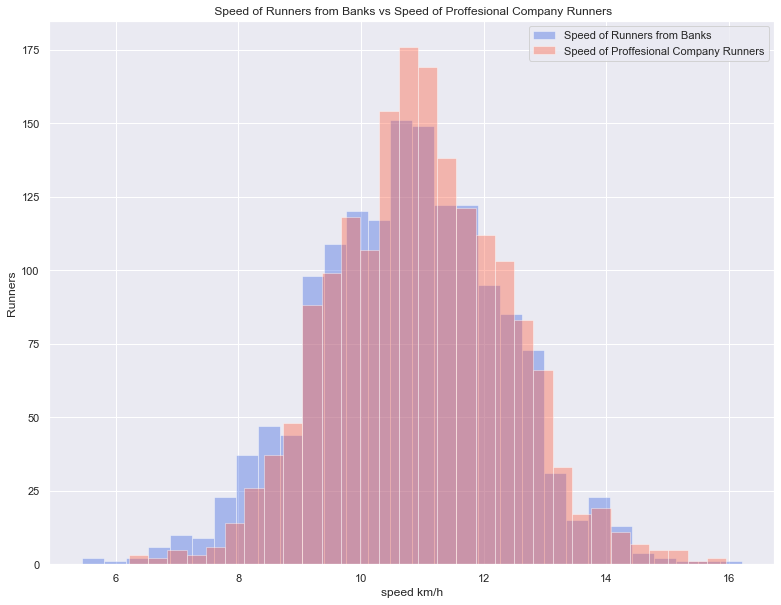

''

In [36]:
#plotting Speeds of both runners from Banks And Proffessional runners
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
sns.distplot(Banks_data['speed'],label='Speed of Runners from Banks',kde=False,color="royalblue")
sns.distplot(Prof_services_co['speed'],label='Speed of Proffesional Company Runners',kde=False,color="tomato")
plt.title(' Speed of Runners from Banks vs Speed of Proffesional Company Runners')
plt.xlabel('speed km/h')
plt.legend()
plt.ylabel('Runners')
plt.show()
;